Intercept            9001209.431844
production_budget         -0.001670
dtype: float64
Intercept            8564859.165273
production_budget         -0.814645
dtype: float64


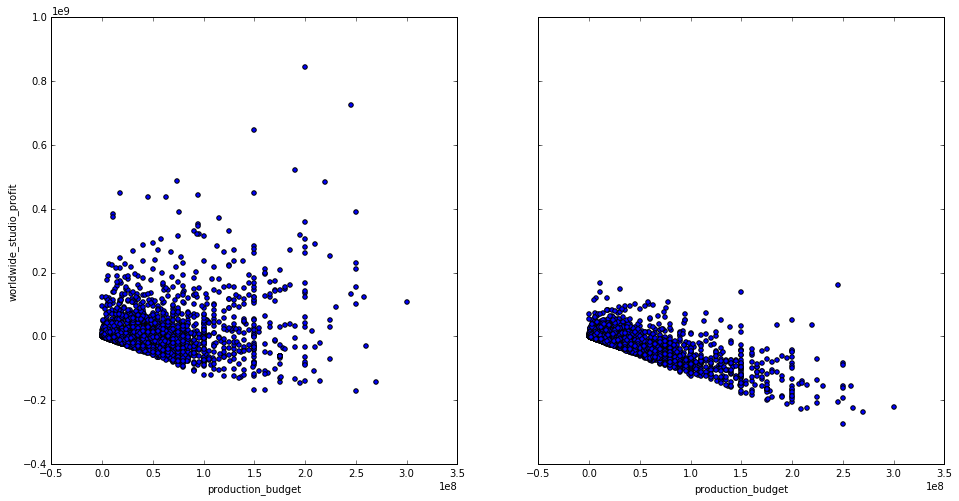

In [57]:
% matplotlib inline

import csv
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

movie_data = pd.read_csv('total_movie_data.csv')

# Index(['movie title', 'rating', 'worldwide total gross', 'release date',
#        'runtime (mins)', 'production budget', 'domestic total gross'],
#       dtype='object')

movie_data.columns = ['movie_title', 'rating', 'worldwide_total_gross', 'release_date',
                     'runtime_mins', 'production_budget', 'domestic_total_gross']

movie_data['worldwide_studio_profit'] = (movie_data['worldwide_total_gross'] - (2.5 * movie_data['production_budget']))/2
movie_data['domestic_studio_profit'] = (movie_data['domestic_total_gross'] - (2.5 * movie_data['production_budget']))/2

#print(movie_data.loc[:30,:])

fig, axs = plt.subplots(1, 2, sharey=True)
movie_data.plot(kind='scatter', x='production_budget', y='worldwide_studio_profit', ax=axs[0], figsize=(16, 8))
movie_data.plot(kind='scatter', x='production_budget', y='domestic_studio_profit', ax=axs[1])

lm_worldwide = smf.ols(formula='worldwide_studio_profit ~ production_budget', data=movie_data).fit()
lm_domestic = smf.ols(formula='domestic_studio_profit ~ production_budget', data=movie_data).fit()

print(lm_worldwide.params)
print(lm_domestic.params)

                                 OLS Regression Results                                
Dep. Variable:     normalized_worldwide_profit   R-squared:                       0.000
Model:                                     OLS   Adj. R-squared:                 -0.001
Method:                          Least Squares   F-statistic:                    0.1506
Date:                         Thu, 21 Apr 2016   Prob (F-statistic):              0.698
Time:                                 16:02:49   Log-Likelihood:                -9518.1
No. Observations:                         1664   AIC:                         1.904e+04
Df Residuals:                             1662   BIC:                         1.905e+04
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------

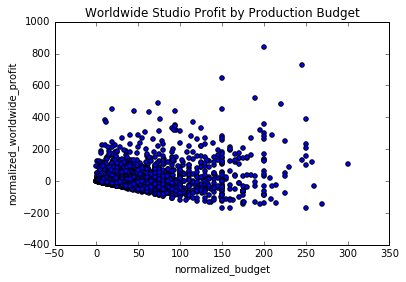

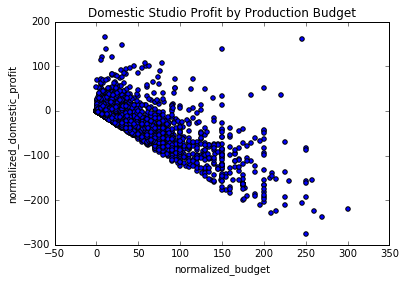

In [13]:
% matplotlib inline

import csv
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

movie_data = pd.read_csv('total_movie_data.csv')

# Index(['movie title', 'rating', 'worldwide total gross', 'release date',
#        'runtime (mins)', 'production budget', 'domestic total gross'],
#       dtype='object')

movie_data.columns = ['movie_title', 'rating', 'worldwide_total_gross', 'release_date',
                     'runtime_mins', 'production_budget', 'domestic_total_gross']

movie_data['worldwide_studio_profit'] = (movie_data['worldwide_total_gross'] - (2.5 * movie_data['production_budget']))/2
movie_data['domestic_studio_profit'] = (movie_data['domestic_total_gross'] - (2.5 * movie_data['production_budget']))/2

movie_data['normalized_worldwide_profit'] = movie_data['worldwide_studio_profit'] / 1000000
movie_data['normalized_domestic_profit'] = movie_data['domestic_studio_profit'] / 1000000
movie_data['normalized_budget'] = movie_data['production_budget'] / 1000000

#print(movie_data)

movie_data_train = movie_data.loc[:2000,:]

lm_worldwide = smf.ols(formula='normalized_worldwide_profit ~ normalized_budget', data=movie_data_train).fit()
lm_domestic = smf.ols(formula='normalized_domestic_profit ~ normalized_budget', data=movie_data_train).fit()

lm_w_beta0, lm_w_beta1 = lm_worldwide.params[0], lm_worldwide.params[1]

lm_d_beta0, lm_d_beta1 = lm_domestic.params[0], lm_domestic.params[1]
print(lm_worldwide.summary())

print(lm_domestic.summary())

print("Spending $150 million brings worldwide profits of: $%i million." % (lm_w_beta0 + (lm_w_beta1 * 150)))
print("Spending $150 million brings domestic profits of: $%2i million." % (lm_d_beta0 + (lm_d_beta1 * 150)))
print("Spending $15 million brings worldwide profits of: $%i million." % (lm_w_beta0 + (lm_w_beta1 * 15)))
print("Spending $15 million brings domestic profits of: $%i million." % (lm_d_beta0 + (lm_d_beta1 * 15)))

plt.figure(figsize=(8,8))
movie_data.plot(x='normalized_budget', y='normalized_worldwide_profit', kind='scatter', title='Worldwide Studio Profit by Production Budget')

movie_data.plot(x='normalized_budget', y='normalized_domestic_profit', kind='scatter', title='Domestic Studio Profit by Production Budget')


Intercept: 
 11.0017646812
Coefficient: 
 -0.0451534728816
Adjusted R-Squared: 
 0.00108996847647


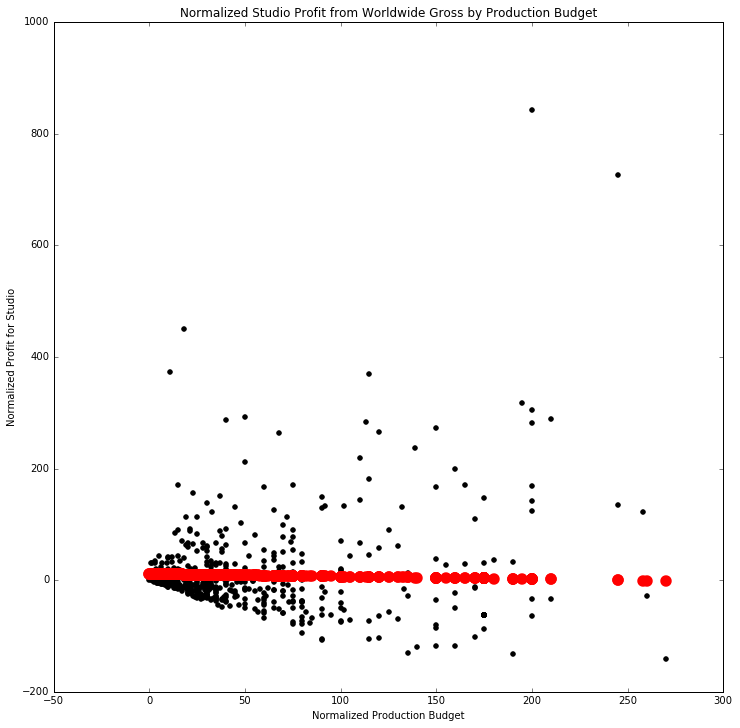

Intercept: 
 11.768491655
Coefficient: 
 -0.849004400659
Adjusted R-Squared: 
 0.694389785949


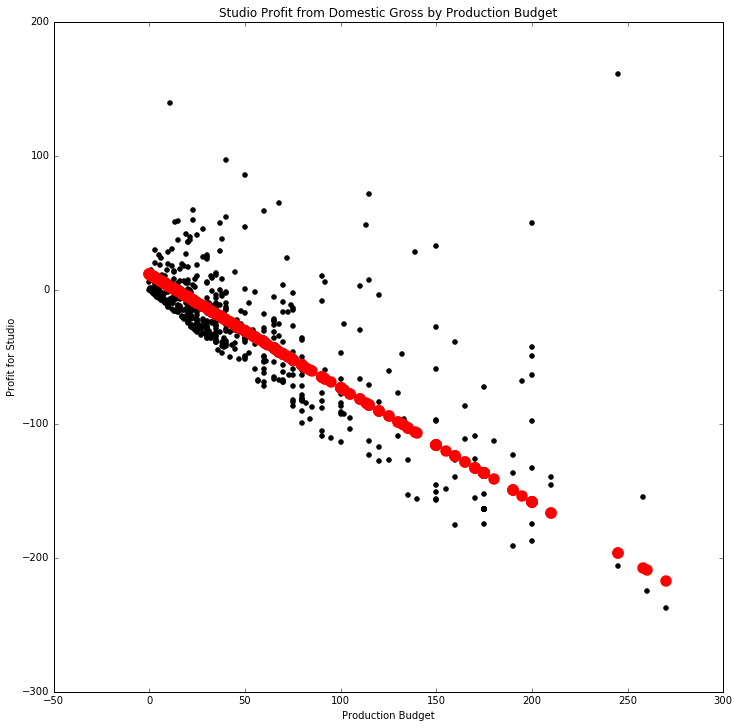

Budget: $150 million, Worldwide Profit: 4 million.
Budget: $150 million, Domestic Profit: $-115 million.
Budget: $15 million, Worldwide Profit: $10 million.
Budget: $15 million, Domestic Profit: $-0.97 million.


In [41]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

movie_data = pd.read_csv('total_movie_data.csv')

# Index(['movie title', 'rating', 'worldwide total gross', 'release date',
#        'runtime (mins)', 'production budget', 'domestic total gross'],
#       dtype='object')

movie_data.columns = ['movie_title', 'rating', 'worldwide_total_gross', 'release_date',
                     'runtime_mins', 'production_budget', 'domestic_total_gross']

movie_data['worldwide_studio_profit'] = (movie_data['worldwide_total_gross'] - (2.5 * movie_data['production_budget']))/2
movie_data['domestic_studio_profit'] = (movie_data['domestic_total_gross'] - (2.5 * movie_data['production_budget']))/2

movie_data = movie_data.dropna(subset=['worldwide_studio_profit','domestic_studio_profit'])

movie_data['normalized_worldwide_profit'] = movie_data['worldwide_studio_profit'] / 1000000
movie_data['normalized_domestic_profit'] = movie_data['domestic_studio_profit'] / 1000000
movie_data['normalized_budget'] = movie_data['production_budget'] / 1000000

# Use only one feature
x_budget = movie_data.normalized_budget.reshape(-1,1)

#print(x_budget)

# Split the data into training/testing sets
x_budget_train = x_budget[:2000]
x_budget_test = x_budget[2000:]

# Split the targets into training/testing sets
y_worldwide_profit = movie_data["normalized_worldwide_profit"]
y_domestic_profit = movie_data["normalized_domestic_profit"]

y_worldwide_profit_train = y_worldwide_profit[:2000]
y_worldwide_profit_test = y_worldwide_profit[2000:]

y_domestic_profit_train = y_domestic_profit[:2000]
y_domestic_profit_test = y_domestic_profit[2000:]

# Create linear regression object
worldwide_regression = linear_model.LinearRegression()

# Train the model using the training sets
worldwide_regression.fit(x_budget_train, y_worldwide_profit_train)
wr_beta0 = worldwide_regression.intercept_
wr_beta1 = worldwide_regression.coef_[0]

# The coefficients
print('Intercept: \n', wr_beta0)
print('Coefficient: \n', wr_beta1)
# The Adjusted R-Squared
print('Adjusted R-Squared: \n', worldwide_regression.score(x_budget_train, y_worldwide_profit_train))

#Plot outputs
plt.figure(figsize=(12,12))
plt.scatter(x_budget_test, y_worldwide_profit_test,  color='black')
plt.scatter(x_budget_test, worldwide_regression.predict(x_budget_test),
         color='red',
         linewidth=7)
plt.xlabel('Normalized Production Budget')
plt.ylabel('Normalized Profit for Studio')
plt.title('Normalized Studio Profit from Worldwide Gross by Production Budget')

plt.show()

domestic_regression = linear_model.LinearRegression()

# Train the model using the training sets
domestic_regression.fit(x_budget_train, y_domestic_profit_train)
dr_beta0 = domestic_regression.intercept_
dr_beta1 = domestic_regression.coef_[0]

# The coefficients
print('Intercept: \n', dr_beta0)
print('Coefficient: \n', dr_beta1)
# The Adjusted R-Squared
print('Adjusted R-Squared: \n', domestic_regression.score(x_budget_train, y_domestic_profit_train))

#Plot outputs
plt.figure(figsize=(12,12))
plt.scatter(x_budget_test, y_domestic_profit_test,  color='black')
plt.scatter(x_budget_test, domestic_regression.predict(x_budget_test),
         color='red',
         linewidth=7)
plt.xlabel('Production Budget')
plt.ylabel('Profit for Studio')
plt.title('Studio Profit from Domestic Gross by Production Budget')

plt.show()

print("Budget: $150 million, Worldwide Profit: %i million." % (wr_beta0 + (wr_beta1 * 150)))
print("Budget: $150 million, Domestic Profit: $%2i million." % (dr_beta0 + (dr_beta1 * 150)))
print("Budget: $15 million, Worldwide Profit: $%i million." % (wr_beta0 + (wr_beta1 * 15)))
print("Budget: $15 million, Domestic Profit: $%.2f million." % (dr_beta0 + (dr_beta1 * 15)))